## Hometask #6
1. Choose 3-4 regression models (e.g., LightGBM, XGBoost) and train them to predict “Gap” target variable on default parameters (use 10-fold cross-validation)
Note: every model has use example on scikit-learn.org

2. Visualize the results via R2 plot (predicted vs. real), compare the models’ performance and training speed

3. Optimize the best-performing model using hyperparameters tuning (grid search)


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [34]:
df = pd.read_csv('PCA_data.csv', index_col=0)

X = df.drop('gap', axis=1)
y = df['gap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [17]:
models = {
    "GradientBoosting": GradientBoostingRegressor(random_state=17, verbose=0),
    "CatBoosting": CatBoostRegressor(random_state=17, verbose=0),
    "XGBoosting": XGBRegressor(random_state=17, verbosity=0)
}

def cross_validation(models, X, y):
    results = {}
    for name, model in models.items():
        start_time = time.time()  
        scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(r2_score))
        end_time = time.time()  
        elapsed_time = end_time - start_time
        results[name] = scores
        print(f"{name}: R2 = {np.mean(scores):.4f} ± {np.std(scores):.4f}")
        print(f"{name} training time: {elapsed_time:.3f} seconds", end='\n\n')
    return results

model_results = cross_validation(models, X_train, y_train)

GradientBoosting: R2 = 0.8094 ± 0.0105
GradientBoosting training time: 478.140 seconds

CatBoosting: R2 = 0.9003 ± 0.0075
CatBoosting training time: 133.025 seconds

XGBoosting: R2 = 0.8672 ± 0.0057
XGBoosting training time: 22.257 seconds



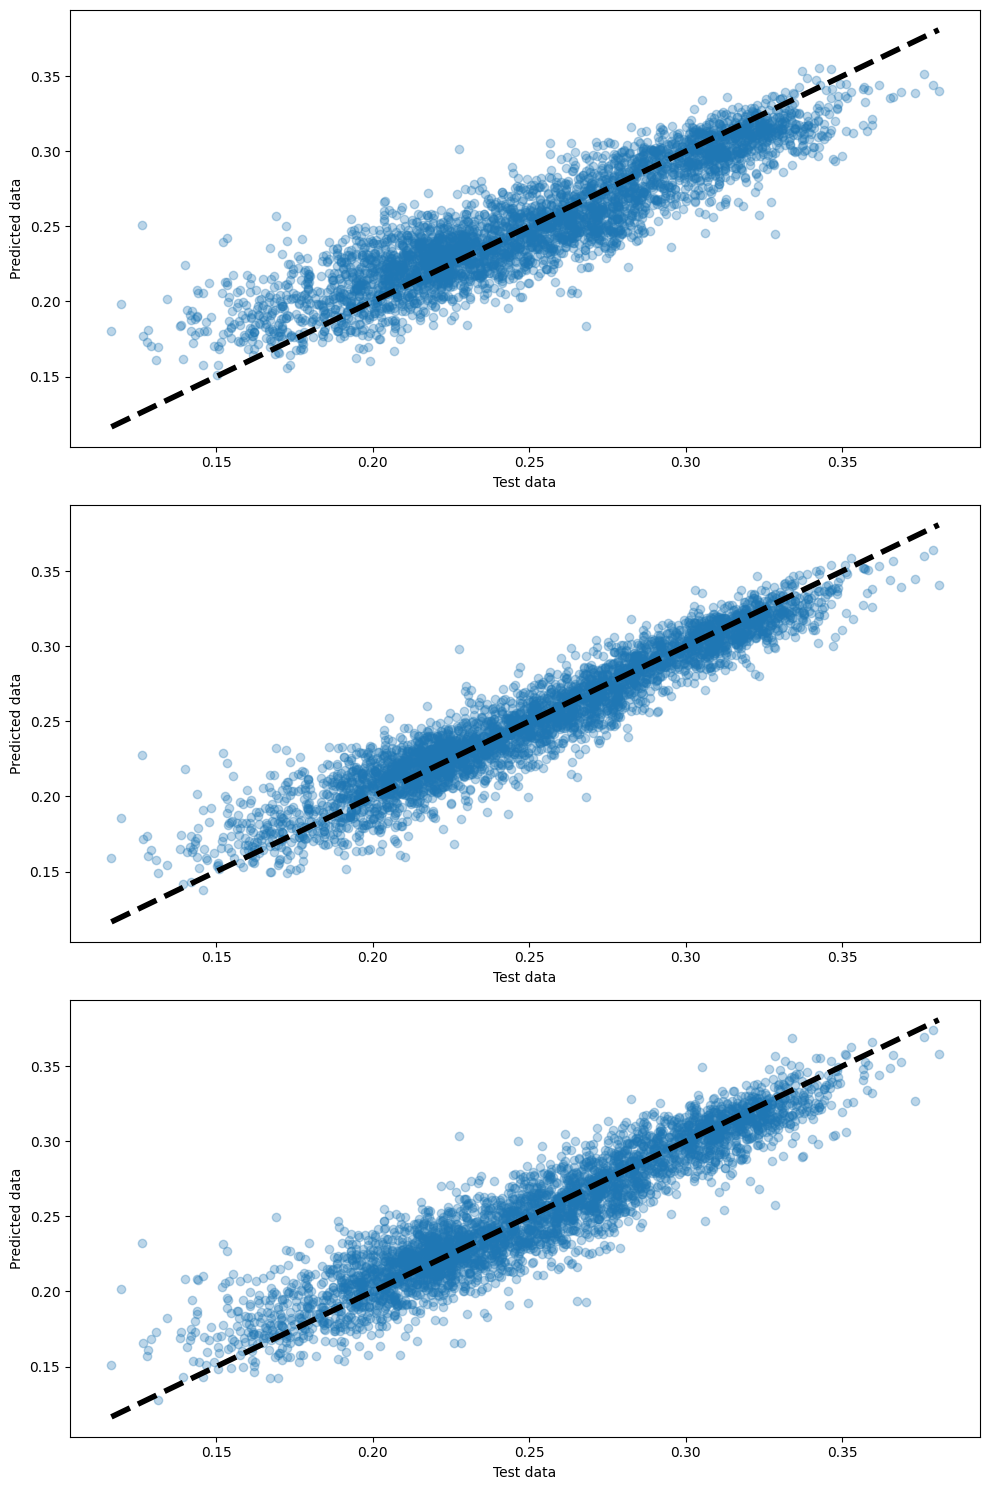

In [38]:
def plot(models, X_train, X_test, y_train, y_test):
    fig, axes = plt.subplots(len(models), 1, figsize=(10, 15))
    for ax, (name, model) in zip(axes, models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        ax.scatter(y_test, predictions, alpha=0.3)
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
        ax.set_xlabel('Test data')
        ax.set_ylabel('Predicted data')
    plt.tight_layout()

plot(models, X_train, X_test, y_train, y_test)

Из рассмотренных моделей наилучшую точность показывает CatBoosting. XGBoosting показал несколько меньшую точность, однако у этой модели самая высокая скорость обучения. GradientBoosting и с точки зрения точности и с точки зрения скорости обучения проигрывает другим моделям. Наиболее эффективной можно признать модель XGBoosting.

In [45]:
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=17, verbosity=0), param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print(f'Лучший R2: {grid_search.best_score_:.4f}')

Лучшие параметры: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Лучшие R2: 0.8779


In [51]:
models = {"XGBoosting_opt": XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8)}

In [52]:
new_result = cross_validation(models, X_train, y_train)

XGBoosting_opt: R2 = 0.8783 ± 0.0076
XGBoosting_opt training time: 25.514 seconds

